In [1]:
raise Exception("RUNNING THE CELLS BELOW WILL TAKE A LONG TIME")

Exception: RUNNING THE CELLS BELOW WILL TAKE A LONG TIME

# Analysis Question 2

(5 points) Find the top ten similar documents to an arbitrary piece of text,
using the doc2vec representations. Analyze the results. Are the documents similar in your
opinion? If not, what is your analysis for the error?

To achieve the discussed results for question A2.1 to following should be ran on the command line: <br>
python doc2vec.py --search "Officials in Washington State confirmed on Sunday two more cases of coronavirus in King County, bringing the total in the county to six and the number in the United States to 73.The two patients, men in their 60s, were in critical condition, King County officials said.This number is expected to rise as more people are tested and results confirmed, public health officials in Seattle and King County said in a statement on Sunday.Washington State has declared a state of emergency over the coronavirus, and researchers who studied two cases there say that the virus may have been spreading for weeks, with the possibility that up to 1,500 people may have been infected.The state became the site of the country’s first coronavirus death on Saturday.The number of confirmed cases worldwide crossed 87,000 as of Sunday, with more than 7,000 cases outside mainland China, where the outbreak began late last year. The virus has now been detected in at least 60 countries."<br>


(5 points) Find the top ten similar words to five words of your choice, based on their word2vec representations. Analyze the results. Are the words similar in your opinion?

In [14]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
import torch.nn as nn
import os
import pytrec_eval
from tqdm import tqdm
import json

from SkipGram import SkipGram
from word2vec import Word2VecRetrieval
from ap_dataset import APDataset
import pickle as pkl

word2vec_retrieval = Word2VecRetrieval(5, 25000, 200, 1000, 'word2vec.pkl')
word2vec_retrieval.find_similar_words('hour')
print('\n')
word2vec_retrieval.find_similar_words('car')
print('\n')
word2vec_retrieval.find_similar_words('beer')
print('\n')
word2vec_retrieval.find_similar_words('dress')
print('\n')
word2vec_retrieval.find_similar_words('art')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
hour
minut
p.m.
a.m.
midnight
a.m
6:30
9:30
noon
7:30
10:30


car
truck
vehicl
pickup
bag
bottl
tire
window
bmw
wagon
rubber


beer
wine
chicken
chocol
cabbag
steak
chees
potato
snack
cooki
butter


dress
shirt
hat
t-shirt
wore
jacket
wear
costum
worn
boot
nake


art
artist
exhibit
theater
ballet
museum
carnegi
manuscript
orchestra
librari
master


# Analysis Question 3

(5 points) For each of the LSI models you built over AP, and for LDA, select the
ve top signicant topics from your model. Check the top terms in each topic. Which
topics actually represent a particular subject? Analyse the results. Do you observe a
dierence?

In [3]:
import os
import json
import pickle as pkl
from collections import defaultdict, Counter

import numpy as np
from tqdm import tqdm

import read_ap
import download_ap

from gensim_corpus import GensimCorpus

from trec import TrecAPI
%load_ext autoreload
%autoreload 2
from lda import LatentDirichletAllocation
from lsi import LatentSemanticIndexing

from trec import TrecAPI

# ensure dataset is downloaded
# download_ap.download_dataset()
# pre-process the text
docs_by_id = None
docs_by_id = read_ap.get_processed_docs()

os.makedirs("results", exist_ok=True)
os.makedirs("saved_models/sim_temps", exist_ok=True)
os.makedirs("raw_output", exist_ok=True)

gensim_corpus = GensimCorpus(docs_by_id, embedding="bow")
lda = LatentDirichletAllocation(gensim_corpus)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Docs already processed. Loading from disk
Reading doc ids
LDA model already trained, loading from disk.


100%|██████████████████████████████████████████████████████| 164557/164557 [00:10<00:00, 15914.23it/s]


In [4]:
lda.model.print_topics(num_topics=-1)[:5]

[(0,
  '0.151*"center" + 0.068*"restor" + 0.062*"shelter" + 0.061*"homeless" + 0.051*"carter" + 0.044*"preserv" + 0.036*"visitor" + 0.026*"peopl" + 0.018*"jimmi" + 0.017*"dedic"'),
 (1,
  '0.109*"safeti" + 0.039*"problem" + 0.037*"inspect" + 0.035*"inspector" + 0.023*"feder" + 0.023*"procedur" + 0.020*"report" + 0.020*"faa" + 0.020*"administr" + 0.018*"mechan"'),
 (2,
  '0.046*"propos" + 0.042*"budget" + 0.039*"cut" + 0.038*"plan" + 0.037*"billion" + 0.026*"spend" + 0.017*"1990" + 0.017*"fiscal" + 0.014*"new" + 0.014*"approv"'),
 (3,
  '0.315*"commerci" + 0.122*"pierc" + 0.093*"rico" + 0.091*"puerto" + 0.067*"disband" + 0.050*"juan" + 0.027*"raft" + 0.026*"sympath" + 0.023*"bulletin" + 0.021*"workshop"'),
 (4,
  '0.065*"polit" + 0.043*"conserv" + 0.037*"liber" + 0.037*"support" + 0.027*"democrat" + 0.023*"oppon" + 0.018*"defeat" + 0.017*"politician" + 0.015*"oppos" + 0.013*"campaign"')]

In [5]:
gensim_corpus = GensimCorpus(docs_by_id, embedding="tfidf")
lsi = LatentSemanticIndexing(gensim_corpus, embedding="tfidf")
lsi.model.print_topics(num_topics=-1)[:5]

Reading doc ids
LSI tfidf model already trained, loading from disk.
Similarities matrix tfidf model already trained, loading from disk.


[(0,
  '0.112*"percent" + 0.104*"stock" + 0.100*"bush" + 0.089*"soviet" + 0.084*"market" + 0.081*"million" + 0.078*"trade" + 0.074*"govern" + 0.073*"compani" + 0.072*"polic"'),
 (1,
  '0.356*"stock" + 0.218*"market" + 0.198*"index" + 0.171*"yen" + 0.170*"trade" + 0.170*"cent" + 0.156*"price" + 0.146*"dollar" + 0.145*"exchang" + 0.133*"share"'),
 (2,
  '0.651*"cent" + -0.228*"stock" + 0.221*"bushel" + 0.194*"soybean" + 0.152*"lower" + 0.146*"higher" + 0.129*"wheat" + 0.127*"futur" + 0.127*"corn" + -0.122*"dukaki"'),
 (3,
  '-0.309*"dukaki" + -0.286*"bush" + -0.201*"cent" + 0.156*"polic" + -0.153*"democrat" + 0.151*"palestinian" + 0.136*"yen" + -0.132*"jackson" + -0.131*"percent" + 0.127*"isra"'),
 (4,
  '-0.328*"yen" + -0.251*"dollar" + -0.197*"soviet" + -0.189*"bush" + -0.163*"dukaki" + -0.128*"tokyo" + 0.116*"compani" + -0.114*"parti" + -0.114*"ounc" + -0.109*"gold"')]

In [6]:
gensim_corpus = GensimCorpus(docs_by_id, embedding="bow")
lsi = LatentSemanticIndexing(gensim_corpus, embedding="bow")
lsi.model.print_topics(num_topics=-1)[:5]

Reading doc ids
LSI bow model already trained, loading from disk.
Similarities matrix bow model already trained, loading from disk.


[(0,
  '0.178*"state" + 0.176*"percent" + 0.167*"new" + 0.134*"one" + 0.133*"peopl" + 0.131*"report" + 0.131*"say" + 0.131*"govern" + 0.131*"n\'t" + 0.129*"presid"'),
 (1,
  '0.786*"percent" + 0.141*"0" + 0.131*"price" + 0.124*"million" + 0.117*"rate" + 0.111*"billion" + 0.102*"cent" + 0.101*"market" + 0.080*"increas" + -0.080*"peopl"'),
 (2,
  '0.395*"percent" + -0.386*"cent" + 0.234*"bush" + -0.197*"million" + -0.183*"market" + -0.168*"price" + -0.152*"trade" + 0.146*"dukaki" + 0.144*"0" + -0.144*"higher"'),
 (3,
  '-0.427*"bush" + -0.223*"dukaki" + -0.201*"cent" + -0.195*"presid" + -0.190*"democrat" + 0.177*"polic" + 0.176*"percent" + -0.142*"campaign" + -0.136*"republican" + 0.133*"offici"'),
 (4,
  '-0.289*"soviet" + -0.233*"cent" + 0.226*"n\'t" + -0.202*"govern" + -0.170*"parti" + -0.165*"u.s." + 0.147*"million" + 0.128*"compani" + -0.126*"unit" + -0.123*"state"')]

# Analysis Question 4

In [7]:
import os
import json
import pickle as pkl
import operator
from pprint import pprint
import argparse

model_names = [
    "lsi_bow",
    "lsi_tfidf",
    "doc2vec",
    "doc2vec_vocab_size",
    "doc2vec_window_size",
    "doc2vec_vec_dim",
    "word2vec",
    "lsa_bow"
]

best_run_results = {
    "tfidf":"./results/tfidf.json",
    "word2vec": "./results/skip_gram.json",
    "doc2vec":"./results/doc2vec_vocab_size_50000_results_trec.json",
    "lsi_tfidf":"./results/lsi-tfidf-embedding-2000-topics.json",
    "lsi_bow":"./results/lsi-bow-embedding-2000-topics.json",
    "lda_bow":"./results/lda-500-topics.json"
}

default_run_results = {
    "tfidf":"./results/tfidf.json",
    "word2vec": "./results/skip_gram.json",
    "doc2vec":"./results/doc2vec_vocab_size_10000_results_trec.json",
    "lsi_tfidf":"./results/lsi-tfidf-embedding-500-topics.json",
    "lsi_bow":"./results/lsi-bow-embedding-500-topics.json",
    "lda_bow":"./results/lda-500-topics.json"
}

lsi_bow_results = {
    "10 topics":"./results/lsi-bow-embedding-10-topics.json",
    "50 topics":"./results/lsi-bow-embedding-50-topics.json",
    "100 topics":"./results/lsi-bow-embedding-100-topics.json",
    "500 topics":"./results/lsi-bow-embedding-500-topics.json",
    "1000 topics":"./results/lsi-bow-embedding-1000-topics.json",
    "2000 topics":"./results/lsi-bow-embedding-2000-topics.json",
}

lsi_tfidf_results = {
    "10 topics":"./results/lsi-tfidf-embedding-10-topics.json",
    "50 topics":"./results/lsi-tfidf-embedding-50-topics.json",
    "100 topics":"./results/lsi-tfidf-embedding-100-topics.json",
    "500 topics":"./results/lsi-tfidf-embedding-500-topics.json",
    "1000 topics":"./results/lsi-tfidf-embedding-1000-topics.json",
    "2000 topics":"./results/lsi-tfidf-embedding-2000-topics.json",
}

doc2vec_window_size_results = {
    "window size 5":"./results/doc2vec_window_size_5_results_trec.json",
    "window size 10":"./results/doc2vec_window_size_10_results_trec.json",
    "window size 15":"./results/doc2vec_window_size_15_results_trec.json",
    "window size 20":"./results/doc2vec_window_size_20_results_trec.json"
}

doc2vec_vec_dim_results = {
    "vec dim 200":"./results/doc2vec_vec_dim_200_results_trec.json",
    "vec dim 300":"./results/doc2vec_vec_dim_300_results_trec.json",
    "vec dim 400":"./results/doc2vec_vec_dim_400_results_trec.json",
    "vec dim 500":"./results/doc2vec_vec_dim_500_results_trec.json"
}

doc2vec_vocab_size_results = {
    "vocab size 1000":"./results/doc2vec_vocab_size_10000_results_trec.json",
    "vocab size 25000":"./results/doc2vec_vocab_size_25000_results_trec.json",
    "vocab size 50000":"./results/doc2vec_vocab_size_50000_results_trec.json",
    "vocab size 100000":"./results/doc2vec_vocab_size_100000_results_trec.json",
    "vocab size 200000":"./results/doc2vec_vocab_size_200000_results_trec.json"
}

doc2vec_results = dict(
    list(doc2vec_window_size_results.items()) + 
    list(doc2vec_vec_dim_results.items()) + 
    list(doc2vec_vocab_size_results.items()))

# AQ 4.1

(5 points) Report the retrieval performance in terms of MAP and nDCG for all
of the methods, on a) all queries, and b) queries 76-100. To be precise, you need to report
24 numbers in a table.

In [8]:
print("\n\n############# AQ4.1 #############\n\n")
default_all_results_per_setup = {}
default_results_per_setup = {}
default_eval_results_per_setup = {}
for model, fn in default_run_results.items():
    with open(fn, "r") as f:
        res = json.load(f)
        res.pop("all", None)
        default_all_results_per_setup[model] = res

    default_results_per_setup[model] = {}
    default_results_per_setup[model]["map"] = sum([q["map"] for q in res.values()]) / len(res)
    default_results_per_setup[model]["ndcg"] = sum([q["ndcg"] for q in res.values()]) / len(res)

    # query ids range from 51 to 200. evaluation set is 76 - 100, we should only use that for
    # parameter tuning.
    query_id_range = list(str(qid) for qid in range(76, 101)) 
    default_eval_results_per_setup[model] = {}
    default_eval_results_per_setup[model]["map"] = sum([res[qid]["map"] for qid in query_id_range]) / len(query_id_range)
    default_eval_results_per_setup[model]["ndcg"] = sum([res[qid]["ndcg"] for qid in query_id_range]) / len(query_id_range)        

print("RETRIEVAL PERFORMANCE ON ALL QUERIES:")
pprint(default_results_per_setup)

print("\nRETRIEVAL PERFORMANCE ON EVAL QUERIES 76-100")
pprint(default_eval_results_per_setup)



############# AQ4.1 #############


RETRIEVAL PERFORMANCE ON ALL QUERIES:
{'doc2vec': {'map': 0.015308724832214769, 'ndcg': 0.3467221476510067},
 'lda_bow': {'map': 0.05803221476510063, 'ndcg': 0.35749060402684546},
 'lsi_bow': {'map': 0.0854167785234899, 'ndcg': 0.4547704697986578},
 'lsi_tfidf': {'map': 0.1566093959731544, 'ndcg': 0.5399912751677852},
 'tfidf': {'map': 0.21975503355704706, 'ndcg': 0.5819409395973155},
 'word2vec': {'map': 0.03523334851360046, 'ndcg': 0.3934156401854176}}

RETRIEVAL PERFORMANCE ON EVAL QUERIES 76-100
{'doc2vec': {'map': 0.007988, 'ndcg': 0.33049999999999996},
 'lda_bow': {'map': 0.023135999999999997, 'ndcg': 0.31302},
 'lsi_bow': {'map': 0.053256000000000005, 'ndcg': 0.4109600000000001},
 'lsi_tfidf': {'map': 0.100868, 'ndcg': 0.4802520000000001},
 'tfidf': {'map': 0.18150000000000002, 'ndcg': 0.5413720000000001},
 'word2vec': {'map': 0.029647071718410786, 'ndcg': 0.37973304204318553}}


# AQ 4.2

(5 points) Signicance testing is a way of showing that if the dierence observed
between the performance of two models is due to chance or not. Use pytrec eval to
perform a t-test between every pair of models, on the complete query set. You need to
report the results of six tests.a

In [9]:
from itertools import combinations
from scipy.stats import ttest_rel

for model_1, model_2 in combinations(list(default_all_results_per_setup.keys()), 2):
    
    first_results = default_all_results_per_setup[model_1]
    second_results = default_all_results_per_setup[model_2]
    
    query_ids = list(
    set(first_results.keys()) & set(second_results.keys()))

    first_scores = [
        first_results[query_id]["map"] for query_id in query_ids]
    second_scores = [
        second_results[query_id]["map"] for query_id in query_ids]

    print("For {} and {}: {}".format(model_1, model_2, ttest_rel(first_scores, second_scores)[1]))


For tfidf and word2vec: 7.815695914892806e-19
For tfidf and doc2vec: 1.8353896475275935e-22
For tfidf and lsi_tfidf: 0.00040752805306730364
For tfidf and lsi_bow: 5.561249922832812e-12
For tfidf and lda_bow: 2.5544396568597995e-18
For word2vec and doc2vec: 6.5198154848564745e-06
For word2vec and lsi_tfidf: 4.147894558331163e-15
For word2vec and lsi_bow: 1.7997795801115068e-06
For word2vec and lda_bow: 0.04424719937243177
For doc2vec and lsi_tfidf: 2.879011182598756e-18
For doc2vec and lsi_bow: 6.145436232921566e-10
For doc2vec and lda_bow: 6.557469103539467e-05
For lsi_tfidf and lsi_bow: 8.649612882066083e-10
For lsi_tfidf and lda_bow: 9.562914792240968e-13
For lsi_bow and lda_bow: 0.008860289408659103


# AQ 4.3

(5 points) Report the retrieval performance in terms of MAP and nDCG for all
of the methods, on a) all queries, and b) test queries. Use the parameters leading to the
best performance on validation set. Attach the results corresponding to each run to
your report.

In [10]:
# set the model type to determine the best settings for.
model = "lsi_bow"

# query ids range from 51 to 200. evaluation set is 76 - 100, we should only use that for
# parameter tuning.
query_id_range = list(str(qid) for qid in range(76, 101))

results_per_setup = {}
param_results = {}
for setup, fn in eval(model + "_results").items():
    with open(fn, "r") as f:
        all_results = json.load(f)
        param_results[setup] = all_results
            
    results_per_setup[setup] = sum([all_results[qid]["map"] for qid in query_id_range]) / len(query_id_range)
    #results_per_setup[fn] = all_results["all"]["map"]

setup, mean_eval_map = max(results_per_setup.items(), key=operator.itemgetter(1))

print("######### TO DETERMINE THE BEST SETUP ###########\n\n")
print("ALL RESULTS:")
pprint(results_per_setup)
print("\nBEST RESULT:\nWith MAP of: {0:.4f} best setup: {1}".format(mean_eval_map, setup))

######### TO DETERMINE THE BEST SETUP ###########


ALL RESULTS:
{'10 topics': 0.004864,
 '100 topics': 0.030288,
 '1000 topics': 0.054824000000000005,
 '2000 topics': 0.05783200000000001,
 '50 topics': 0.024951999999999995,
 '500 topics': 0.053256000000000005}

BEST RESULT:
With MAP of: 0.0578 best setup: 2000 topics


In [11]:
all_results_per_setup = {}
results_per_setup = {}
eval_results_per_setup = {}
for model, fn in best_run_results.items():
    with open(fn, "r") as f:
        res = json.load(f)
        res.pop("all", None)
        all_results_per_setup[model] = res

    results_per_setup[model] = {}
    results_per_setup[model]["map"] = sum([q["map"] for q in res.values()]) / len(res)
    results_per_setup[model]["ndcg"] = sum([q["ndcg"] for q in res.values()]) / len(res)

    # query ids range from 51 to 200. evaluation set is 76 - 100, we should only use that for
    # parameter tuning.
    query_id_range = list(str(qid) for qid in range(76, 101)) 
    eval_results_per_setup[model] = {}
    eval_results_per_setup[model]["map"] = sum([res[qid]["map"] for qid in query_id_range]) / len(query_id_range)
    eval_results_per_setup[model]["ndcg"] = sum([res[qid]["ndcg"] for qid in query_id_range]) / len(query_id_range)

print("RETRIEVAL PERFORMANCE ON ALL QUERIES:")
pprint(default_results_per_setup)

print("\nRETRIEVAL PERFORMANCE ON EVAL QUERIES 76-100")
pprint(default_eval_results_per_setup)

RETRIEVAL PERFORMANCE ON ALL QUERIES:
{'doc2vec': {'map': 0.015308724832214769, 'ndcg': 0.3467221476510067},
 'lda_bow': {'map': 0.05803221476510063, 'ndcg': 0.35749060402684546},
 'lsi_bow': {'map': 0.0854167785234899, 'ndcg': 0.4547704697986578},
 'lsi_tfidf': {'map': 0.1566093959731544, 'ndcg': 0.5399912751677852},
 'tfidf': {'map': 0.21975503355704706, 'ndcg': 0.5819409395973155},
 'word2vec': {'map': 0.03523334851360046, 'ndcg': 0.3934156401854176}}

RETRIEVAL PERFORMANCE ON EVAL QUERIES 76-100
{'doc2vec': {'map': 0.007988, 'ndcg': 0.33049999999999996},
 'lda_bow': {'map': 0.023135999999999997, 'ndcg': 0.31302},
 'lsi_bow': {'map': 0.053256000000000005, 'ndcg': 0.4109600000000001},
 'lsi_tfidf': {'map': 0.100868, 'ndcg': 0.4802520000000001},
 'tfidf': {'map': 0.18150000000000002, 'ndcg': 0.5413720000000001},
 'word2vec': {'map': 0.029647071718410786, 'ndcg': 0.37973304204318553}}


# AQ 4.4

AQ4.4: (5 points) Perform a t-test between the result of each method using the best
parameters and the default ones used in AQ4.1. Describe your observations.

In [12]:
from itertools import combinations
from scipy.stats import ttest_rel

for model in default_all_results_per_setup:
    
    first_results = default_all_results_per_setup[model]
    second_results = all_results_per_setup[model]
    
    query_ids = list(
    set(first_results.keys()) & set(second_results.keys()))

    first_scores = [
        first_results[query_id]["map"] for query_id in query_ids]
    second_scores = [
        second_results[query_id]["map"] for query_id in query_ids]

    print("For {}: {}".format(model, ttest_rel(first_scores, second_scores)[1]))


d:\david\miniconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
d:\david\miniconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
d:\david\miniconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


For tfidf: nan
For word2vec: nan
For doc2vec: 0.655069631206225
For lsi_tfidf: 0.1581082935231672
For lsi_bow: 6.926306286359561e-05
For lda_bow: nan


# AQ 4.5

AQ4.5: (5 points)For each parameter, plot the retrieval performance in terms of MAP
with respect to the value of the parameter, for a) all queries, and b) test queries. Describe
your ndings.

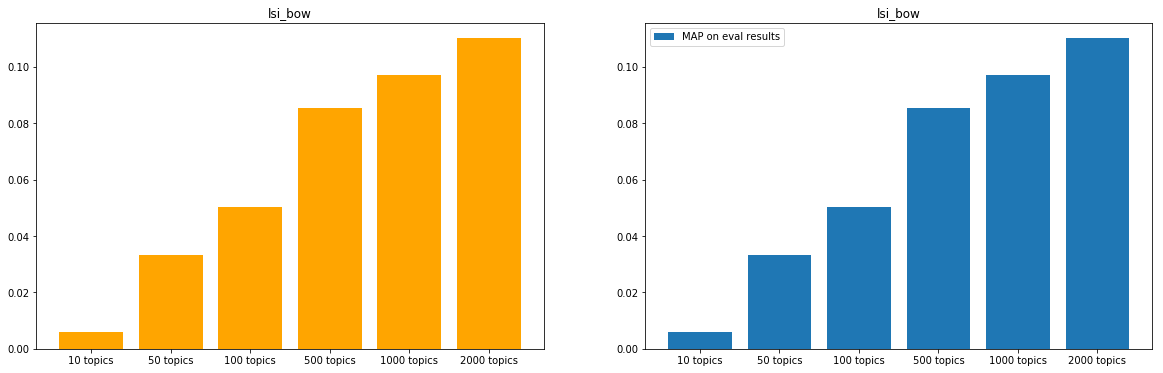

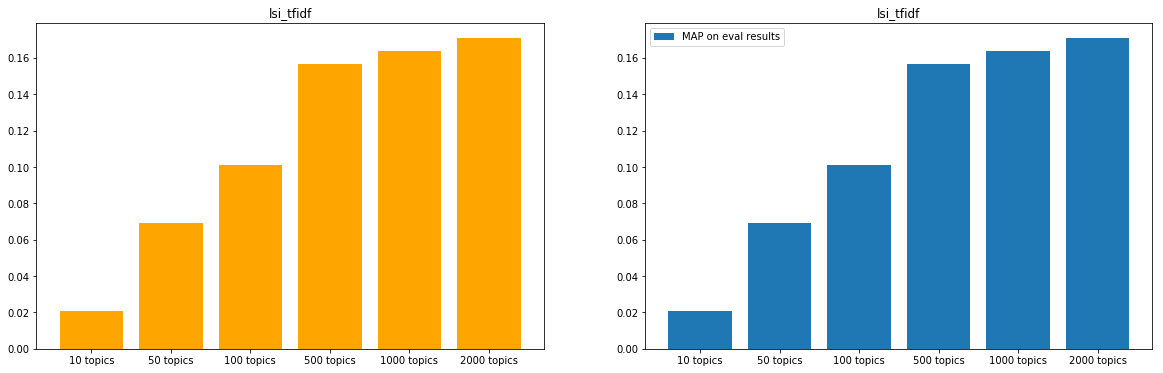

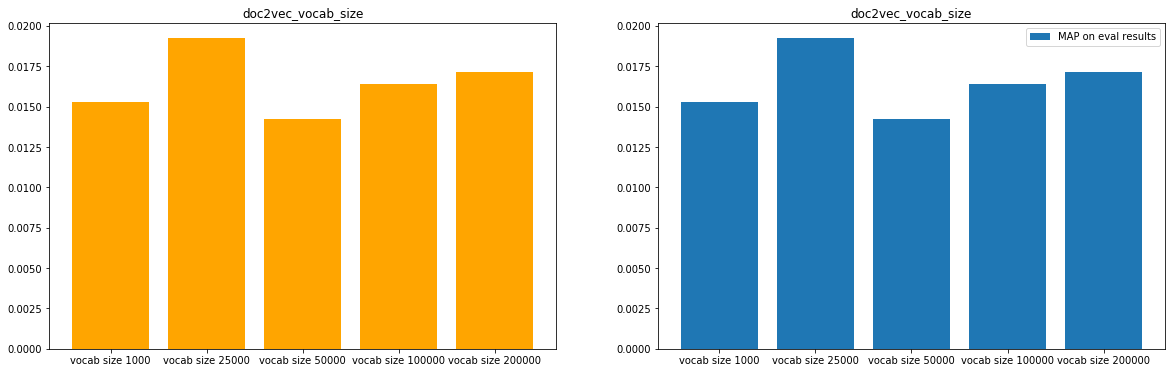

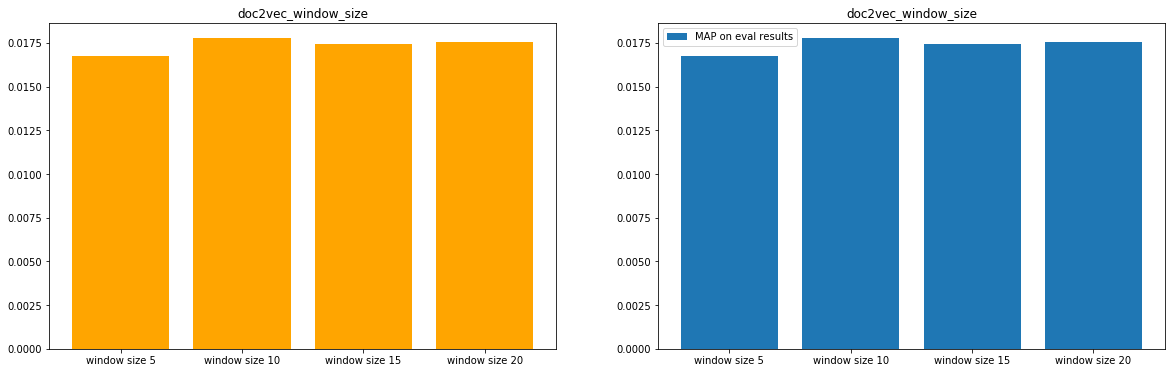

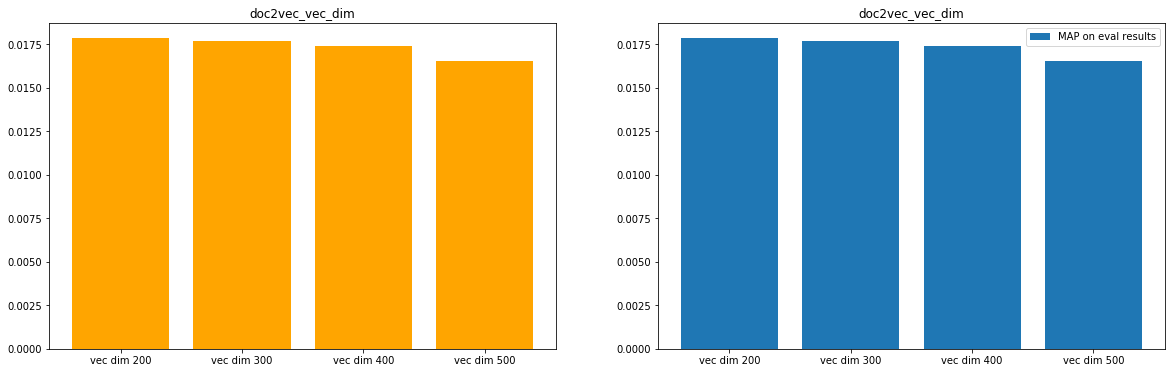

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
tune_models = [
    "lsi_bow", "lsi_tfidf", "doc2vec_vocab_size", "doc2vec_window_size", "doc2vec_vec_dim"
]

query_id_range = list(str(qid) for qid in range(76, 101))

for model in tune_models:
    results_per_setup = {}
    eval_results_per_setup = {}
    for setup, fn in eval(model + "_results").items():
        with open(fn, "r") as f:
            res = json.load(f)

        results_per_setup[setup] = sum([q["map"] for q in res.values()]) / len(res)
        eval_results_per_setup[setup] = sum([res[qid]["map"] for qid in query_id_range]) / len(query_id_range)

    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    setups = list(results_per_setup.keys())
    maps = list(results_per_setup.values())
    ax[0].bar(setups, maps, color="orange", label="MAP on full results")
    ax[0].set_title(model)

    setups = list(eval_results_per_setup.keys())
    maps = list(eval_results_per_setup.values())
    ax[1].bar(setups, maps, label="MAP on eval results")
    ax[1].set_title(model)
    plt.legend()
    plt.savefig("./results/param-tuning-plots-{}.png".format(model))
    plt.show()

# AQ 4.6

AQ4.6: (5 points) Doing a query-level analysis provides insights on the weaknesses and
strengths of the retrieval models. For each of the four retrieval methods implemented
above, find success and failure cases: queries for which the MAP was highest or lowest.
Analyse the results, possibly with checking the qrels file. Discuss why you think each case
happened

In [14]:
qrels, queries = read_ap.read_qrels()

In [15]:
res_per_model = {}

for model, fn in best_run_results.items():
    with open(fn, "r") as f:
        res = json.load(f)
        res.pop("all", None)
        res = {qid:res[qid]["map"] for qid in res.keys()}

    res_per_model[model] = {
        "best":max(res.items(), key=operator.itemgetter(1)),
        "worst":min(res.items(), key=operator.itemgetter(1)),
    }

for model, stats in res_per_model.items():
    best = stats["best"][0]
    worst = stats["worst"][0]
    
    print("\n#######{}########".format(model))
    print("With MAP of {}, BEST query {}:\n".format(stats["best"][1], best))
    print(queries[best])
    print("relevant docs:\n", qrels[best].keys(), len(qrels[best].keys()))
    print("\nWith MAP of {}, WORST query {}:\n".format(stats["worst"][1], worst))
    print(queries[worst])
    print("relevant docs:\n", qrels[worst].keys(), len(qrels[worst].keys()))


#######tfidf########
With MAP of 0.8413, BEST query 163:

  Vietnam Veterans and Agent Orange 

relevant docs:
 dict_keys(['AP880318-0002', 'AP880318-0076', 'AP880322-0032', 'AP880325-0081', 'AP880429-0264', 'AP880512-0014', 'AP880516-0274', 'AP880526-0180', 'AP880609-0047', 'AP880630-0195', 'AP880630-0207', 'AP880630-0325', 'AP880701-0009', 'AP880701-0251', 'AP880702-0162', 'AP880705-0105', 'AP880706-0116', 'AP880709-0004', 'AP880723-0059', 'AP880730-0025', 'AP880813-0089', 'AP880814-0052', 'AP880815-0056', 'AP880902-0065', 'AP881018-0205', 'AP881019-0035', 'AP881021-0013', 'AP881111-0102', 'AP881111-0117', 'AP881111-0142', 'AP881111-0167', 'AP881111-0226', 'AP881221-0124', 'AP881224-0002', 'AP890103-0006', 'AP890125-0053', 'AP890125-0175', 'AP890223-0024', 'AP890302-0076', 'AP890315-0162', 'AP890330-0110', 'AP890405-0294', 'AP890406-0111', 'AP890411-0237', 'AP890417-0253', 'AP890501-0185', 'AP890509-0015', 'AP890509-0035', 'AP890509-0218', 'AP890512-0009', 'AP890512-0222', 'AP890524

 dict_keys(['AP880220-0140', 'AP880302-0009', 'AP880309-0222', 'AP880317-0024', 'AP880407-0194', 'AP880414-0086', 'AP880422-0238', 'AP880425-0021', 'AP880425-0111', 'AP880425-0161', 'AP880426-0153', 'AP880427-0006', 'AP880427-0132', 'AP880427-0139', 'AP880427-0212', 'AP880502-0027', 'AP880505-0011', 'AP880515-0032', 'AP880518-0165', 'AP880523-0159', 'AP880527-0036', 'AP880606-0001', 'AP880606-0011', 'AP880606-0098', 'AP880607-0032', 'AP880616-0086', 'AP880627-0092', 'AP880630-0119', 'AP880714-0017', 'AP880722-0209', 'AP880723-0033', 'AP880728-0154', 'AP880801-0158', 'AP880825-0039', 'AP880906-0018', 'AP880908-0026', 'AP880908-0188', 'AP880912-0126', 'AP880919-0020', 'AP880928-0109', 'AP881005-0021', 'AP881005-0280', 'AP881006-0026', 'AP881010-0126', 'AP881011-0221', 'AP881014-0221', 'AP881015-0040', 'AP881030-0100', 'AP881031-0027', 'AP881031-0127', 'AP881101-0147', 'AP881102-0020', 'AP881117-0113', 'AP881121-0147', 'AP881203-0052', 'AP881223-0160', 'AP890101-0043', 'AP890131-0169', 'A

# AQ 4.7

AQ4.7: (5 points) Find the top-5 queries that have the highest variance in terms of MAP
between different retrieval models. Provide an analysis why the performance of the models
differs a lot on these queries compared to the rest

In [16]:
from collections import defaultdict

map_per_qid = defaultdict(lambda:{})

for model, fn in best_run_results.items():
    with open(fn, "r") as f:
        res = json.load(f)
        res.pop("all", None)
        res = {qid:res[qid]["map"] for qid in res.keys()}

    for qid, val in res.items():
        map_per_qid[qid][model] = val

var_per_qid = {}
        
for qid, vals in map_per_qid.items():
    var_per_qid[qid] = np.var(list(vals.values()))
    
sorted_vars = [(k, v) for k, v in sorted(var_per_qid.items(), key=lambda item: -item[1])]
highest_var = sorted_vars[:5]

In [18]:
for q, var in highest_var:
    print("Variance: {} Query - {}: {} - {} relevant docs".format(var, q, queries[q], len(qrels[q])))
    
    for model, val in map_per_qid[q].items():
        print("MAP for model: {} - {}".format(model, val))
    print()

Variance: 0.10407121513101968 Query - 163:   Vietnam Veterans and Agent Orange 
 - 78 relevant docs
MAP for model: tfidf - 0.8413
MAP for model: word2vec - 0.012819021409994013
MAP for model: doc2vec - 0.004
MAP for model: lsi_tfidf - 0.6581
MAP for model: lsi_bow - 0.6381
MAP for model: lda_bow - 0.3581

Variance: 0.10140635101143868 Query - 78:   Greenpeace 
 - 129 relevant docs
MAP for model: tfidf - 0.7459
MAP for model: word2vec - 0.009318313554952337
MAP for model: doc2vec - 0.0076
MAP for model: lsi_tfidf - 0.7179
MAP for model: lsi_bow - 0.3777
MAP for model: lda_bow - 0.053

Variance: 0.10076965661089904 Query - 117:   Capacity of the U.S. Cellular Telephone Network 
 - 29 relevant docs
MAP for model: tfidf - 0.6528
MAP for model: word2vec - 0.002150450401871969
MAP for model: doc2vec - 0.0009
MAP for model: lsi_tfidf - 0.698
MAP for model: lsi_bow - 0.007
MAP for model: lda_bow - 0.0003

Variance: 0.09317729898787656 Query - 70:   Surrogate Motherhood 
 - 40 relevant docs
MAP